   Hours Pass Fail  Grades
0   0.50      FAIL   72.50
1   0.75      FAIL   73.75
2   1.00      FAIL   75.00
3   1.25      FAIL   76.25
4   1.50      FAIL   77.50
          Hours                                                   
          count   mean       std   min     25%    50%     75%  max
Pass Fail                                                         
FAIL       10.0  1.775  0.982132  0.50  1.0625  1.625  2.3750  3.5
PASS       10.0  3.800  1.246105  1.75  2.8750  4.125  4.6875  5.5
Coefficients are  [[-0.92419996  0.75602391]]
Checking the y-intercept  [-0.92419996]
Score is  0.75
Probability of student passing with 3.1 hours studying is 0.621348110683
Probability of student failing with 3.1 hours studying is 0.378651889317
Probability of student passing with 7 hours studying is 0.969044728109
Probability of student failing with 7 hours studying is 0.0309552718912


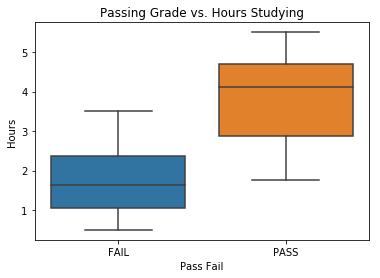

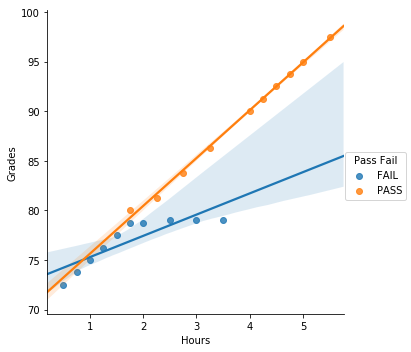

In [1]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.interactive(True)


df = pd.read_csv("/Users/jessie.sully/PycharmProjects/Data_150/data/Transposed studentgrades - Sheet1.csv")
print(df.head())
print(df[['Hours','Pass Fail']].groupby('Pass Fail').describe())
sns.boxplot(x = 'Pass Fail', y = 'Hours', data = df)
plt.title('Passing Grade vs. Hours Studying')

lr = LogisticRegression()
# Required input variables to LogisticRegression
# X : {array-like, sparse matrix}, shape (n_samples, n_features)
# y : array-like, shape (n_samples,)
X = np.column_stack((np.ones(len(df)), df['Hours']))
y = df['Pass Fail']
lr.fit(X, y)
print("Coefficients are ", lr.coef_)
# Note intercept is beta0 given above
print("Checking the y-intercept ", lr.intercept_)
# Note the score is not retunred by the LinearRegression object. It has to be computed from the input.
print("Score is ", lr.score(X, y))

[prob_fail3, prob_pass3] = lr.predict_proba([[1, 3.1]])[0]
print('Probability of student passing with 3.1 hours studying is ' + str(prob_pass3))
print('Probability of student failing with 3.1 hours studying is ' + str(prob_fail3))

[prob_fail7, prob_pass7] = lr.predict_proba([[1, 7]])[0]
print('Probability of student passing with 7 hours studying is ' + str(prob_pass7))
print('Probability of student failing with 7 hours studying is ' + str(prob_fail7))


g1 = sns.lmplot('Hours', 'Grades', data=df, hue = 'Pass Fail', fit_reg=True)
#g1.fig.set_size_inches(12,6)








plt.show(block = True)
